# Random Forest Model 

In [ ]:
#Please check your python environment whether you've downloaded as below 
#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import ensemble, metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math
import joblib

#Draw Graphics
import seaborn as sns 
from sklearn.metrics import confusion_matrix 

In [17]:
# Read csv file (the file clean from 觀光局、文化部資料整理並儲存.py )
dataset = pd.read_csv('1_delete.csv') #replace by your file name
dataset = dataset.astype(int)
dataset

,purpose,age,education,job,marriage,income,residence,gender
0,1,11,6,11,2,4,2,2
1,1,7,16,1,2,8,6,2
2,1,7,16,4,2,7,1,1
3,1,5,16,2,1,7,2,2
4,1,5,16,5,2,8,3,2
...,...,...,...,...,...,...,...,...
42073,5,4,16,3,1,6,2,1
42074,5,5,14,9,1,6,12,2
42075,5,11,14,13,2,8,14,2
42076,5,6,18,1,1,8,11,2


In [18]:
#將dataset shuffle
dataset = shuffle(dataset)
label = dataset.purpose
dataset = dataset[dataset.columns[1:8]]
dataset

,age,education,job,marriage,income,residence,gender
28782,10,12,6,2,5,10,1
5470,8,16,6,2,6,4,1
11609,5,16,11,2,2,1,2
41921,3,16,14,1,2,1,1
11086,5,16,11,2,3,14,2
...,...,...,...,...,...,...,...
7321,5,18,4,1,6,5,1
36137,2,16,14,1,2,2,2
30782,2,16,6,1,4,3,2
744,11,9,7,1,2,5,1


In [19]:
#svm
#引入library
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(10, True)
predicted = []
expected = []

#訓練模型
X_train =[]
Y_train =[]
X_test =[]
Y_test = []
for train, test in kfold.split(dataset):
    X_train = dataset.iloc[train]
    Y_train = label.iloc[train]
    X_test = dataset.iloc[test]
    Y_test = label.iloc[test]
    
    forest = RandomForestClassifier(n_estimators = 40,
                                    #max_depth=4, 
                                    criterion = 'entropy' 
                                    )
    forest.fit(X_train, Y_train)
    expected.extend(Y_test)
    predicted.extend(forest.predict(X_test))
    
    """
    # SVM模組
    svm = OneVsRestClassifier(SVC(gamma='scale', C=3.0, cache_size = 9000)).fit(X_train, Y_train)
    expected.extend(Y_test) #往後追加test label
    predicted.extend(svm.predict(X_test))
    """

C:\Users\Kun\.conda\envs\py38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Macro-average: 0.6319241407339544
Micro-average: 0.6334426541185417
              precision    recall  f1-score   support

           1       0.65      0.71      0.68     14026
           2       0.63      0.56      0.59     14026
           5       0.62      0.63      0.62     14026

    accuracy                           0.63     42078
   macro avg       0.63      0.63      0.63     42078
weighted avg       0.63      0.63      0.63     42078

[[10016  1923  2087]
 [ 2907  7846  3273]
 [ 2489  2745  8792]]
Accuracy: 63.34%
Average = macro, 每個類別進行算術平均
precision: 0.6327053130227441
recall: 0.6334426541185417
F1-score: 0.6319241407339544


Average = micro, Precision = Recall = F1_score = Accuracy
precision: 0.6334426541185417
recall: 0.6334426541185417
F1-score: 0.6334426541185417


Average = weighted 對每一個類別的f1 scores進行加權平均,權重為各類別在y_true中所佔比例
precision: 0.6327053130227441
recall: 0.6334426541185417
F1-score: 0.6319241407339544


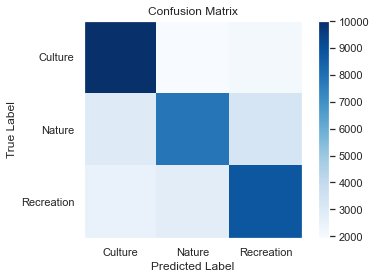

In [52]:
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat, interpolation='nearest', cmap = plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    #labels = ['文化知性', '自然生態', '遊憩飲食']
    labels = ['Culture', 'Nature', 'Recreation']
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.grid(False)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()



#Output
print("Macro-average: {0}".format(metrics.f1_score(expected,predicted,average='macro')))
print("Micro-average: {0}".format(metrics.f1_score(expected,predicted,average='micro')))
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy = accuracy_score(expected, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


print("Average = macro, 每個類別進行算術平均")
print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
print('recall:',metrics.recall_score(expected, predicted,average='macro'))
print('F1-score:',metrics.f1_score(expected, predicted,average='macro'))

print("\n")
print("Average = micro, Precision = Recall = F1_score = Accuracy")
print('precision:', metrics.precision_score(expected, predicted, average='micro')) 
print('recall:',metrics.recall_score(expected, predicted,average='micro'))
print('F1-score:',metrics.f1_score(expected, predicted,average='micro'))

print("\n")
print("Average = weighted 對每一個類別的f1 scores進行加權平均,權重為各類別在y_true中所佔比例")
print('precision:', metrics.precision_score(expected, predicted, average='weighted'))
print('recall:',metrics.recall_score(expected, predicted,average='weighted'))
print('F1-score:',metrics.f1_score(expected,predicted,average='weighted'))


C1=metrics.confusion_matrix(expected, predicted)
plot_confusion_matrix(C1)


In [46]:
X_test.head(1)

,age,education,job,marriage,income,residence,gender
11086,5,16,11,2,3,14,2


In [11]:
personal_data = pd.DataFrame({'age':[4],'education':[6], 'job':[3], 'marriage':[1], 'income':[3],'residence':[2],'gender':[1]})
output = forest.predict(personal_data)
output

array([5])

In [12]:
# model saving 
joblib.dump(forest , "RForest0221.plk")  #儲存
#clf2 = joblib.load("assistant.plk")  #讀取
#print(clf2.score(X_test , y_test))  #使用

['RForest0221.plk']

# Feature Importance

In [47]:
imp = forest.feature_importances_
imp

array([0.13093777, 0.12723567, 0.17972655, 0.02014251, 0.19650398,
       0.31461074, 0.03084278])

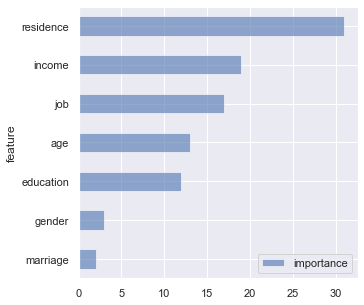

In [48]:
# 製圖
# 特徵重要程度
importances = pd.DataFrame(imp, columns=["importance"])
feature_data = pd.DataFrame(X_train.columns, columns=["feature"])
importance = pd.concat([feature_data, importances], axis=1)
# 倒叙排序
importance = importance.sort_values(["importance"], ascending=True)
importance["importance"] = (importance["importance"]* 100).astype(int)
importance = importance.sort_values(["importance"])
importance.set_index('feature', inplace=True)
importance.plot.barh(color='b',alpha=0.6, rot=0, figsize=(5, 5))
plt.show()

In [ ]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [ ]:
#畫決策樹的圖 (check your labels of input data, whcih could make this image size lagrer)
"""
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

#SHOW Decision Tree
estimator = forest.estimators_[5]

Feature_Name = ['age','education', 'job', 'marriage', 'income', 'residence', 'gender']
#Feature_Name = ['job', 'marriage', 'residence', 'gender']
#Class_Name = ['1', '2', '3', '4', '5', '6', '7', '8']
Class_Name = ['1', '2', '5']


dot_data = StringIO()
export_graphviz(estimator, 
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Feature_Name, class_names=Class_Name)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('forest.png')
Image(graph.create_png())
"""

